# T1 - Geolocalização e Mapas Digitais
---
## **Análise de preços residenciais na cidade de São Paulo**
*   Luigi Guimarães Trevisan - 22.01102-0
*   Vitor Moretti Negresiolo - 22.01049-0


### **1. Importação de bibliotecas e dados**

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm

,CLASSID,FEATID,REVISIONNU,NOME_DIST,SIGLA_DIST,COD_DIST,COD_SUB,DATA_CRIAC,USUARIO_ID,geometry
0,4.0,8583485.0,1.0,JOSE BONIFACIO,JBO,47,27,2007-03-19,0.0,"MULTIPOLYGON (((-46.44623 -23.55651, -46.4461 ..."
1,4.0,8583484.0,1.0,JD SAO LUIS,JDS,46,18,2007-03-19,0.0,"MULTIPOLYGON (((-46.75838 -23.64859, -46.75835..."
2,4.0,8583445.0,1.0,ARTUR ALVIM,AAL,5,21,2007-03-19,0.0,"MULTIPOLYGON (((-46.47502 -23.52381, -46.47501..."
3,4.0,8583479.0,1.0,JAGUARA,JAG,40,08,2007-03-19,0.0,"MULTIPOLYGON (((-46.756 -23.49516, -46.75599 -..."
4,4.0,8583437.0,1.0,VILA PRUDENTE,VPR,93,29,2007-03-19,0.0,"MULTIPOLYGON (((-46.58148 -23.57298, -46.58145..."
...,...,...,...,...,...,...,...,...,...,...
91,4.0,8583433.0,1.0,VILA MARIA,VMR,89,07,2007-03-19,0.0,"MULTIPOLYGON (((-46.58508 -23.52832, -46.58519..."
92,4.0,8583434.0,1.0,VILA MARIANA,VMN,90,12,2007-03-19,0.0,"MULTIPOLYGON (((-46.65081 -23.59868, -46.6508 ..."
93,4.0,8583435.0,1.0,VILA MATILDE,VMT,91,21,2007-03-19,0.0,"MULTIPOLYGON (((-46.54827 -23.53505, -46.54842..."
94,4.0,8583412.0,1.0,SANTA CECILIA,SCE,69,09,2007-03-19,0.0,"MULTIPOLYGON (((-46.66362 -23.53701, -46.66355..."


<Axes: >

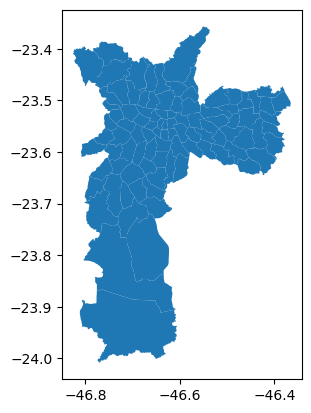

In [5]:
with open("./files/bairros.geojson", "r") as f:
    bairros = gpd.read_file(f)
bairros.set_geometry("geometry", crs=4326, inplace=True)

display(bairros)
bairros.plot()

In [8]:
pricing = pd.read_csv('./files/prices.csv')

pricing['district'] = pricing['district'].str.upper()
pricing['district'] = pricing['district'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

display(pricing)

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,BELENZINHO,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,VILA MARIETA,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,PINHEIROS,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,VILA RE,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,BELA VISTA,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,SANTO AMARO,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,JARDIM VITORIA REGIA,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,JARDIM CARAVELAS,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,JARDIM FONTE DO MORUMBI,76,1,0,Apartamento,9000,10200
